**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
vec = dir(txt_fdiry)
print(vec)

  [1] "hclust.col.annotation.prepare.chipseq_full.fcc.tss.rds"                                       
  [2] "hclust.col.annotation.prepare.chipseq_full.only.rds"                                          
  [3] "hclust.col.annotation.test_chrX.chipseq_full.only.rds"                                        
  [4] "hclust.row.annotation.prepare.chipseq_full.fcc.tss.rds"                                       
  [5] "hclust.row.annotation.prepare.chipseq_full.only.rds"                                          
  [6] "hclust.row.annotation.test_chrX.chipseq_full.only.rds"                                        
  [7] "hdbscan.metric_euclidean.min_cluster_size_1e2.umap.prepare.cre.chipseq_full.fcc.tss.pkl"      
  [8] "hdbscan.metric_euclidean.min_cluster_size_1e3.umap.prepare.cre.chipseq_full.fcc.tss.pkl"      
  [9] "hdbscan.metric_manhattan.min_cluster_size_1e2.annotation.prepare.cre.chipseq_full.fcc.pkl"    
 [10] "hdbscan.metric_manhattan.min_cluster_size_1e2.annotation.prepare.cre.chipse

## Full annotation (Total regions)

In [19]:
### set directory
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "umap*mca_dim*prepare*cre*chipseq_full*tsv"
txt_fglob = file.path(txt_fdiry, txt_fname)
vec_txt_fpath = Sys.glob(txt_fglob)
vec_txt_fname = basename(vec_txt_fpath)
vec_txt_fname

[1] "umap.metric_euclidean.n_neighbors_15.mca_dim50.prepare.cre.chipseq_full.fcc.tss.tsv"
 [2] "umap.metric_euclidean.n_neighbors_15.mca_dim70.prepare.cre.chipseq_full.fcc.tss.tsv"
 [3] "umap.metric_euclidean.n_neighbors_15.mca_dim90.prepare.cre.chipseq_full.fcc.tss.tsv"
 [4] "umap.metric_euclidean.n_neighbors_50.mca_dim50.prepare.cre.chipseq_full.fcc.tss.tsv"
 [5] "umap.metric_euclidean.n_neighbors_50.mca_dim90.prepare.cre.chipseq_full.fcc.tss.tsv"
 [6] "umap.metric_euclidean.n_neighbors_60.mca_dim50.prepare.cre.chipseq_full.fcc.tss.tsv"
 [7] "umap.metric_euclidean.n_neighbors_60.mca_dim70.prepare.cre.chipseq_full.fcc.tss.tsv"
 [8] "umap.metric_euclidean.n_neighbors_60.mca_dim90.prepare.cre.chipseq_full.fcc.tss.tsv"
 [9] "umap.metric_euclidean.n_neighbors_70.mca_dim50.prepare.cre.chipseq_full.fcc.tss.tsv"
[10] "umap.metric_euclidean.n_neighbors_70.mca_dim70.prepare.cre.chipseq_full.fcc.tss.tsv"
[11] "umap.metric_euclidean.n_neighbors_70.mca_dim90.prepare.cre.chipseq_full.fcc.tss.tsv"
[12] "umap.metric_euclidean.n_neighbors_90.mca_dim50.prepare.cre.chipseq_full.fcc.tss.tsv"
[13] "umap.metric_euclidean.n_neighbors_90.mca_dim70.prepare.cre.chipseq_full.fcc.tss.tsv"
[14] "umap.metric_euclidean.n_neighbors_90.mca_dim90.prepare.cre.chipseq_full.fcc.tss.tsv"

In [20]:
vec_txt_metric    = c("euclidean")
vec_num_neighbors = as.character(c(15, 60, 70, 90))

dat = expand.grid(X = vec_txt_metric, Y = vec_num_neighbors)
dat = dat %>% dplyr::mutate(
    Z = paste(
        "umap",
        paste("metric",      X, sep = "_"),
        paste("n_neighbors", Y, sep = "_"),
        sep = "."
    )
)
vec_txt_prefix = dat$Z
print(vec_txt_prefix)

[1] "umap.metric_euclidean.n_neighbors_15"
[2] "umap.metric_euclidean.n_neighbors_60"
[3] "umap.metric_euclidean.n_neighbors_70"
[4] "umap.metric_euclidean.n_neighbors_90"


In [31]:
### set directory
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)

### import data
lst = lapply(vec_txt_prefix, function(txt_prefix){
    
    txt_fname = paste(
        txt_prefix, 
        "mca_dim90.prepare.cre.chipseq_full.fcc.tss.tsv",
        sep = "."
    )
    print(txt_fname)
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec_txt_prefix

### assign
lst_dat_umap = lst

[1] "umap.metric_euclidean.n_neighbors_15.mca_dim90.prepare.cre.chipseq_full.fcc.tss.tsv"
[1] "umap.metric_euclidean.n_neighbors_60.mca_dim90.prepare.cre.chipseq_full.fcc.tss.tsv"
[1] "umap.metric_euclidean.n_neighbors_70.mca_dim90.prepare.cre.chipseq_full.fcc.tss.tsv"
[1] "umap.metric_euclidean.n_neighbors_90.mca_dim90.prepare.cre.chipseq_full.fcc.tss.tsv"


In [32]:
### init
lst = lst_dat_umap
num = 10000

###
theme_txt = theme(title = element_text(size=20))

###
lst = lapply(names(lst), function(txt){

    ### get data
    dat = lst[[txt]]
    
    ### sample rows
    set.seed(123)
    idx = sort(sample(1:nrow(dat), size = num))
    dat = dat[idx,]

    ### plot
    gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2)) + 
        geom_point(alpha = 0.1) + 
        labs(title = txt) +
        theme_cowplot() + 
        background_grid() +
        theme_txt
    
    return(gpt)
})

lst_gpt = lst

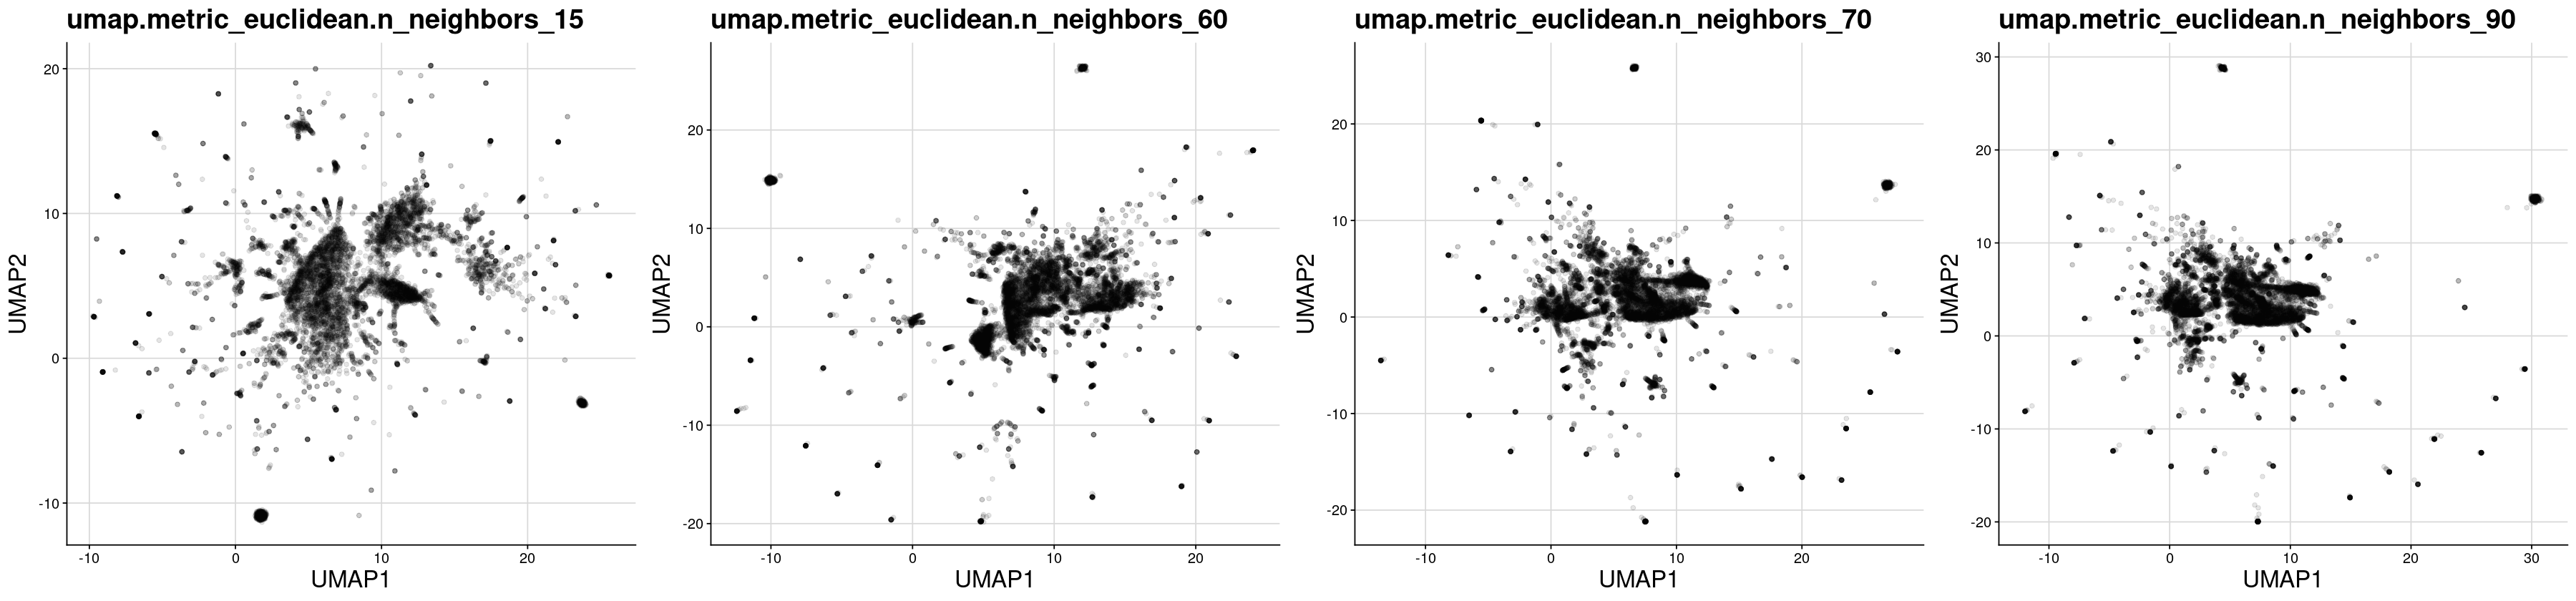

In [33]:
options(repr.plot.height=7, repr.plot.width=30)
plot_grid(plotlist = lst_gpt, nrow=1)

## Full annotation (CREs regions)

In [12]:
vec_txt_metric    = c("manhattan", "cosine", "hamming", "jaccard")
vec_num_neighbors = as.character(c(15, 50, 60, 70, 90))

dat = expand.grid(X = vec_txt_metric, Y = vec_num_neighbors)
dat = dat %>% dplyr::mutate(
    Z = paste(
        "umap",
        paste("metric",      X, sep = "_"),
        paste("n_neighbors", Y, sep = "_"),
        sep = "."
    )
)
vec_txt_prefix = dat$Z
print(vec_txt_prefix)

 [1] "umap.metric_manhattan.n_neighbors_15"
 [2] "umap.metric_cosine.n_neighbors_15"   
 [3] "umap.metric_hamming.n_neighbors_15"  
 [4] "umap.metric_jaccard.n_neighbors_15"  
 [5] "umap.metric_manhattan.n_neighbors_50"
 [6] "umap.metric_cosine.n_neighbors_50"   
 [7] "umap.metric_hamming.n_neighbors_50"  
 [8] "umap.metric_jaccard.n_neighbors_50"  
 [9] "umap.metric_manhattan.n_neighbors_60"
[10] "umap.metric_cosine.n_neighbors_60"   
[11] "umap.metric_hamming.n_neighbors_60"  
[12] "umap.metric_jaccard.n_neighbors_60"  
[13] "umap.metric_manhattan.n_neighbors_70"
[14] "umap.metric_cosine.n_neighbors_70"   
[15] "umap.metric_hamming.n_neighbors_70"  
[16] "umap.metric_jaccard.n_neighbors_70"  
[17] "umap.metric_manhattan.n_neighbors_90"
[18] "umap.metric_cosine.n_neighbors_90"   
[19] "umap.metric_hamming.n_neighbors_90"  
[20] "umap.metric_jaccard.n_neighbors_90"  


In [13]:
### set directory
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)

### import data
lst = lapply(vec_txt_prefix, function(txt_prefix){
    
    txt_fname = paste(
        txt_prefix, 
        "annotation.prepare.cre.chipseq_full.fcc.tss.tsv",
        sep = "."
    )
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec_txt_prefix

### assign
lst_dat_umap = lst

In [16]:
### init
lst = lst_dat_umap
num = 10000

###
theme_txt = theme(title = element_text(size=20))

###
lst = lapply(names(lst), function(txt){

    ### get data
    dat = lst[[txt]]
    
    ### sample rows
    set.seed(123)
    idx = sort(sample(1:nrow(dat), size = num))
    dat = dat[idx,]

    ### plot
    gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2)) + 
        geom_point(alpha = 0.1) + 
        labs(title = txt) +
        theme_cowplot() + 
        background_grid() +
        theme_txt
    
    return(gpt)
})

lst_gpt = lst

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


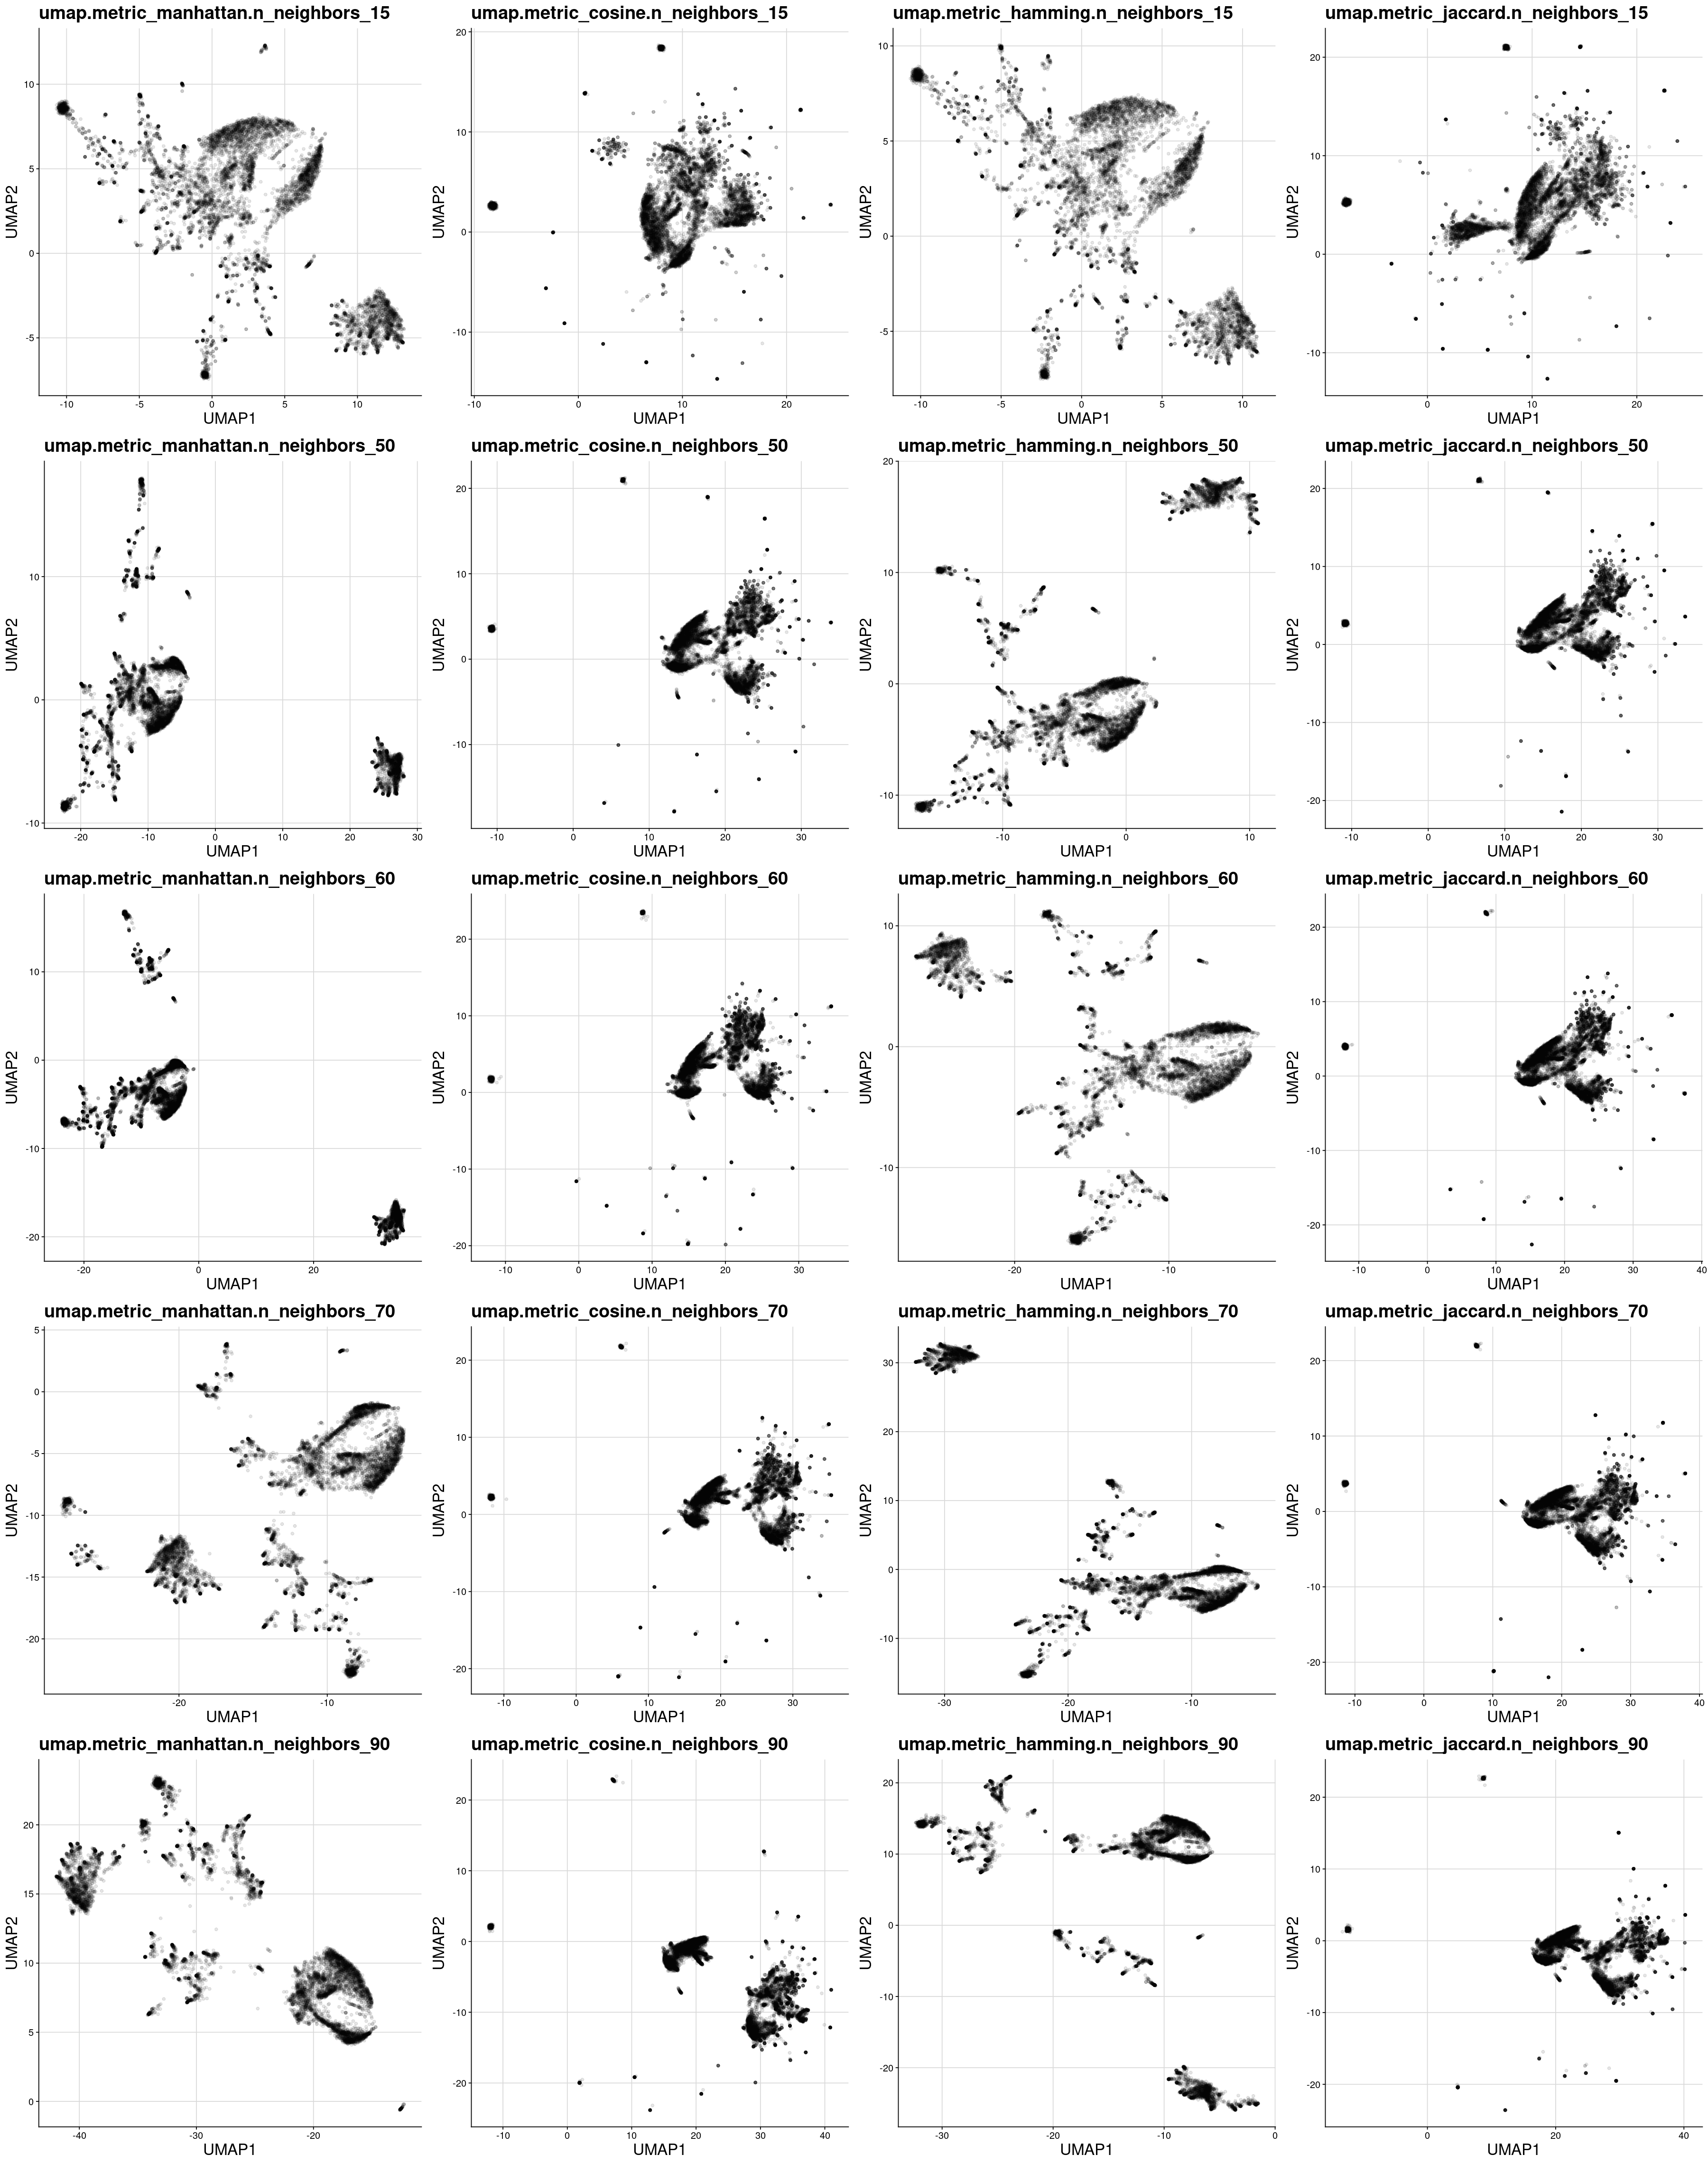

In [17]:
options(repr.plot.height=38, repr.plot.width=30)
plot_grid(plotlist = lst_gpt, ncol=4)

## ChIP-seq only

In [ ]:
vec_txt_metric    = c("manhattan", "cosine", "hamming", "jaccard")
vec_num_neighbors = as.character(c(15, 50, 60, 70, 90))

dat = expand.grid(X = vec_txt_metric, Y = vec_num_neighbors)
dat = dat %>% dplyr::mutate(
    Z = paste(
        "umap",
        paste("metric",      X, sep = "_"),
        paste("n_neighbors", Y, sep = "_"),
        sep = "."
    )
)
vec_txt_prefix = dat$Z
print(vec_txt_prefix)

In [10]:
### set directory
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)

### import data
lst = lapply(vec_txt_prefix, function(txt_prefix){
    
    txt_fname = paste(
        txt_prefix, 
        "annotation.prepare.cre.chipseq_full.only.tsv",
        sep = "."
    )
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec_txt_prefix

### assign
lst_dat_umap = lst

In [11]:
### init
lst = lst_dat_umap
num = 10000

###
theme_txt = theme(title = element_text(size=20))

###
lst = lapply(names(lst), function(txt){

    ### get data
    dat = lst[[txt]]
    
    ### sample rows
    set.seed(123)
    idx = sort(sample(1:nrow(dat), size = num))
    dat = dat[idx,]

    ### plot
    gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2)) + 
        geom_point(alpha = 0.5) + 
        labs(title = txt) +
        theme_cowplot() + 
        background_grid() +
        theme_txt
    
    return(gpt)
})

lst_gpt = lst

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


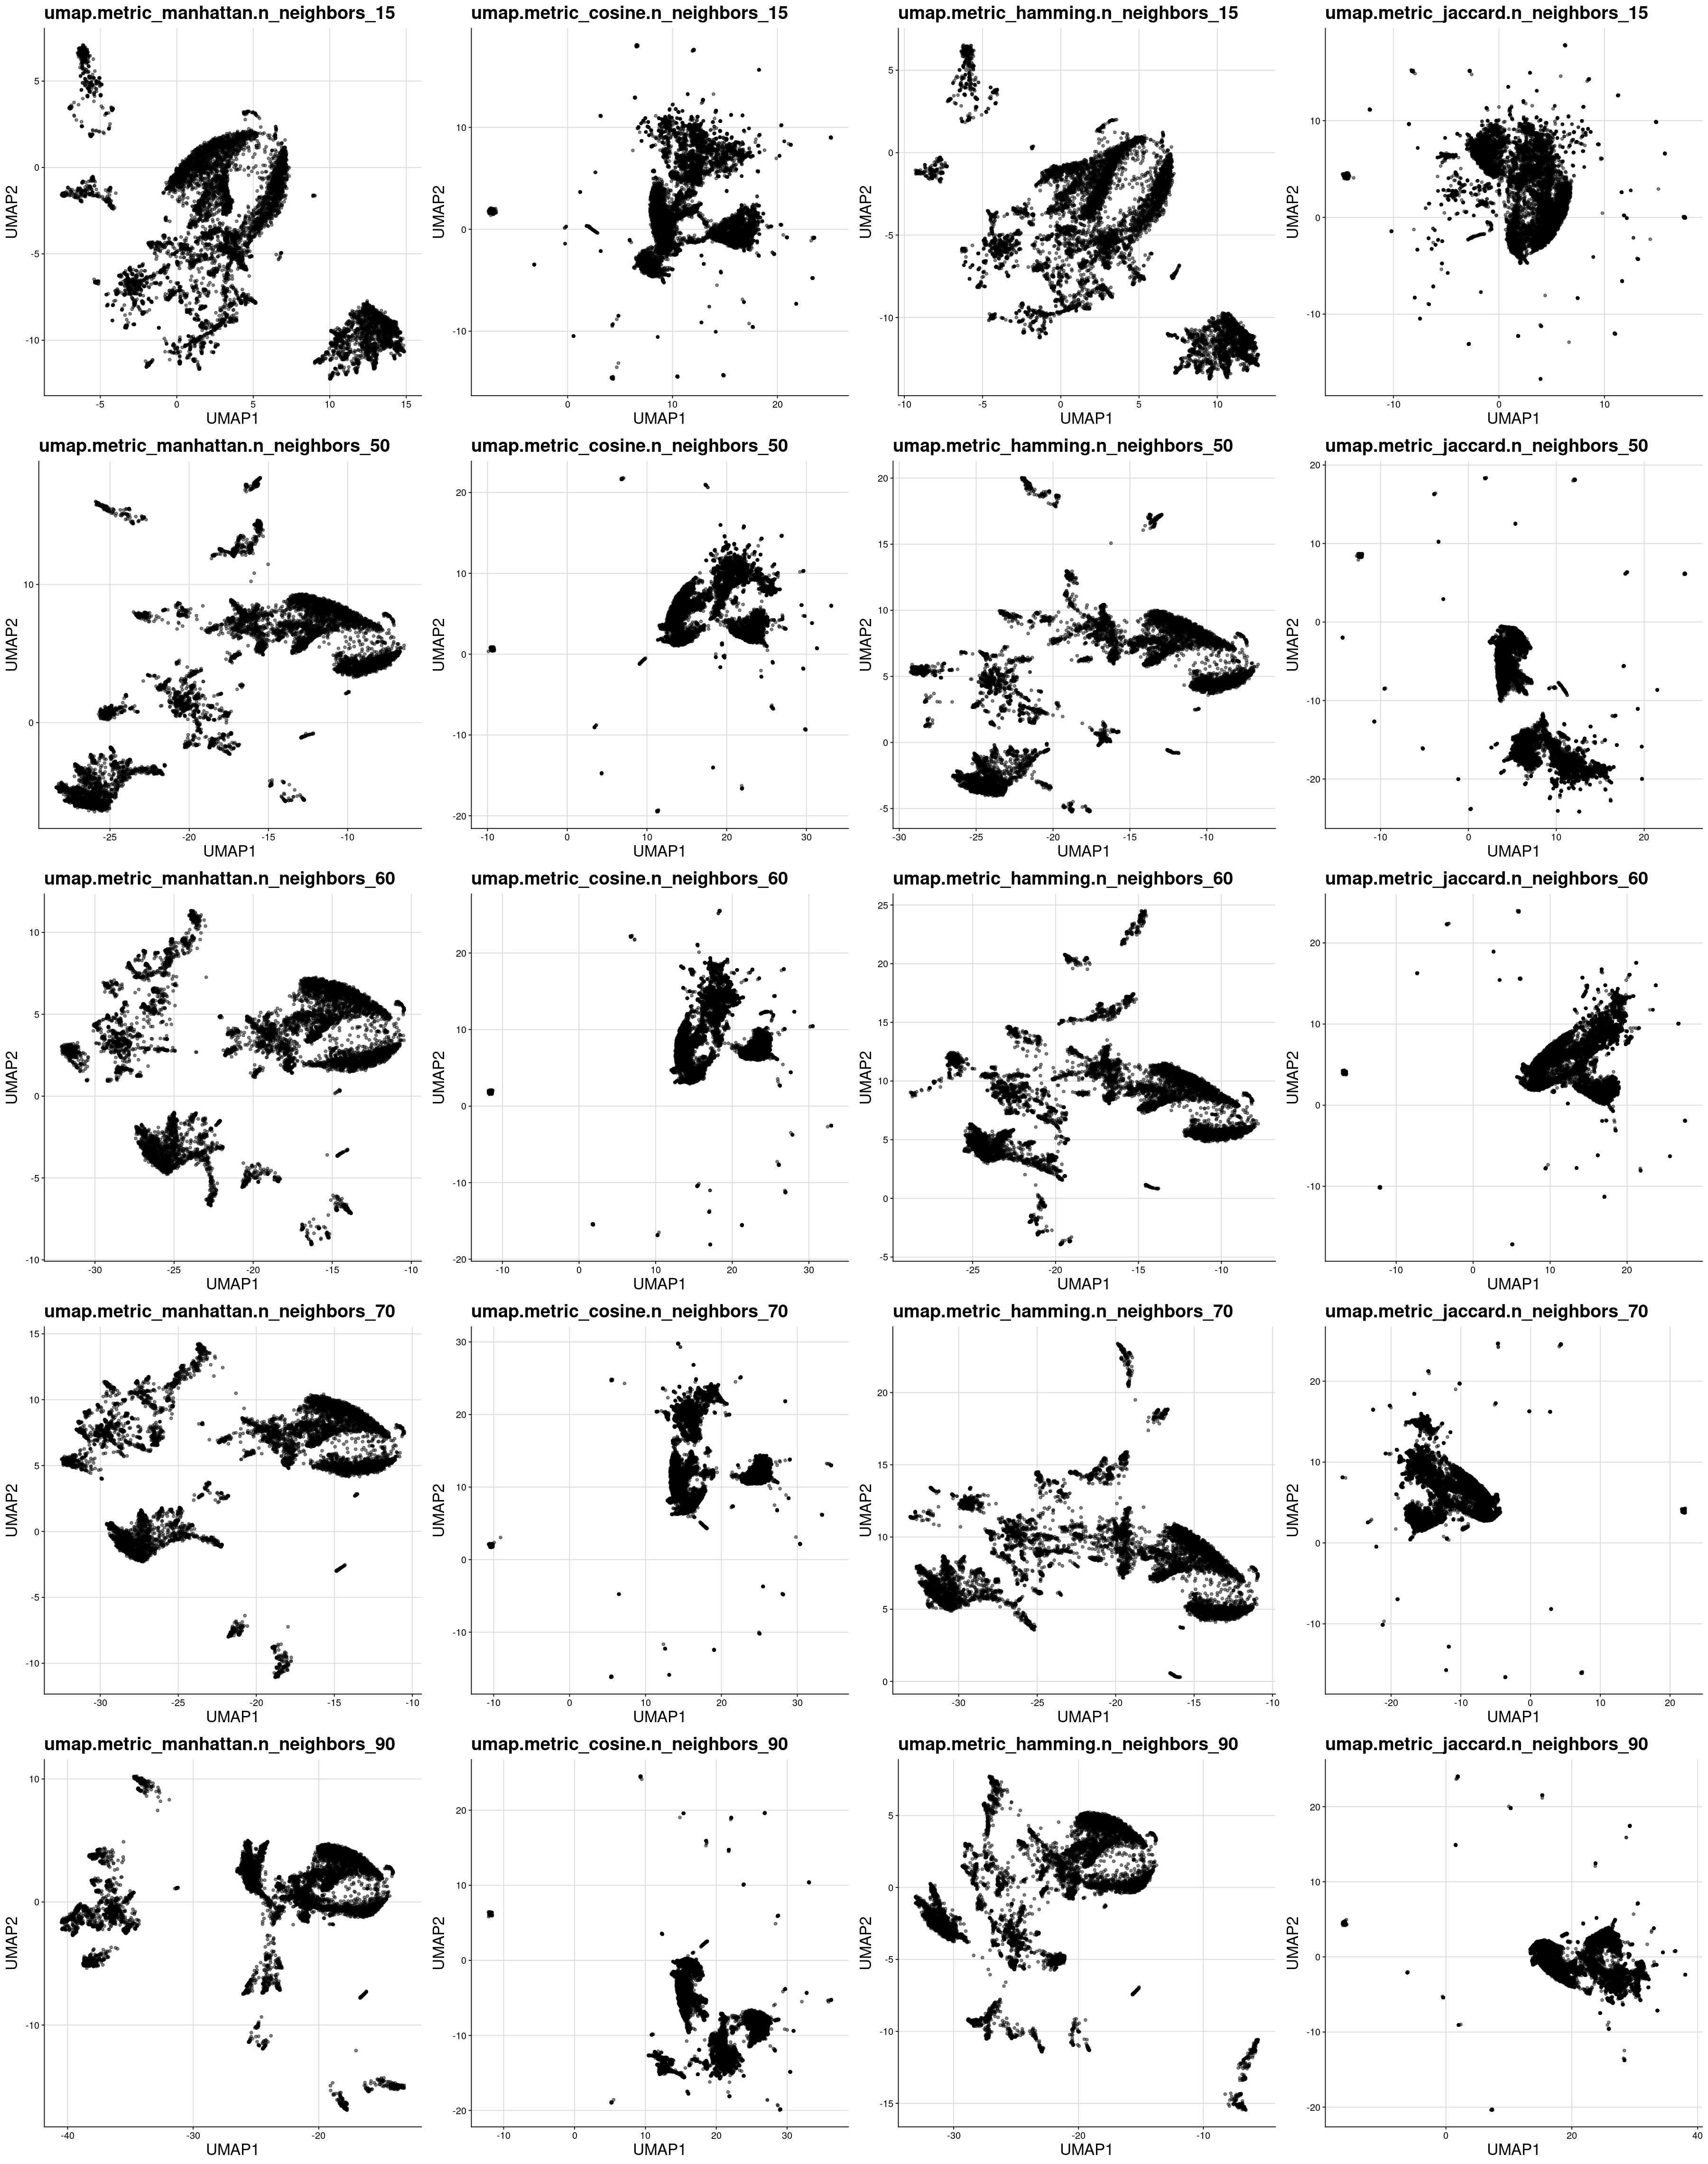

In [12]:
options(repr.plot.height=38, repr.plot.width=30)
plot_grid(plotlist = lst_gpt, nrow=5)

## No TSS

In [17]:
### set directory
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "umap*prepare.cre.chipseq_full.fcc.tsv"
txt_fglob = file.path(txt_fdiry, txt_fname)
vec_txt_fpath = Sys.glob(txt_fglob)
vec_txt_fname = basename(vec_txt_fpath)
vec_txt_fname

[1] "umap.metric_cosine.n_neighbors_15.annotation.prepare.cre.chipseq_full.fcc.tsv"   
 [2] "umap.metric_cosine.n_neighbors_50.annotation.prepare.cre.chipseq_full.fcc.tsv"   
 [3] "umap.metric_cosine.n_neighbors_60.annotation.prepare.cre.chipseq_full.fcc.tsv"   
 [4] "umap.metric_cosine.n_neighbors_70.annotation.prepare.cre.chipseq_full.fcc.tsv"   
 [5] "umap.metric_cosine.n_neighbors_90.annotation.prepare.cre.chipseq_full.fcc.tsv"   
 [6] "umap.metric_hamming.n_neighbors_15.annotation.prepare.cre.chipseq_full.fcc.tsv"  
 [7] "umap.metric_hamming.n_neighbors_50.annotation.prepare.cre.chipseq_full.fcc.tsv"  
 [8] "umap.metric_hamming.n_neighbors_60.annotation.prepare.cre.chipseq_full.fcc.tsv"  
 [9] "umap.metric_hamming.n_neighbors_70.annotation.prepare.cre.chipseq_full.fcc.tsv"  
[10] "umap.metric_hamming.n_neighbors_90.annotation.prepare.cre.chipseq_full.fcc.tsv"  
[11] "umap.metric_jaccard.n_neighbors_15.annotation.prepare.cre.chipseq_full.fcc.tsv"  
[12] "umap.metric_jaccard.n_neighbors_50.annotation.prepare.cre.chipseq_full.fcc.tsv"  
[13] "umap.metric_jaccard.n_neighbors_60.annotation.prepare.cre.chipseq_full.fcc.tsv"  
[14] "umap.metric_jaccard.n_neighbors_70.annotation.prepare.cre.chipseq_full.fcc.tsv"  
[15] "umap.metric_jaccard.n_neighbors_90.annotation.prepare.cre.chipseq_full.fcc.tsv"  
[16] "umap.metric_manhattan.n_neighbors_15.annotation.prepare.cre.chipseq_full.fcc.tsv"
[17] "umap.metric_manhattan.n_neighbors_50.annotation.prepare.cre.chipseq_full.fcc.tsv"
[18] "umap.metric_manhattan.n_neighbors_70.annotation.prepare.cre.chipseq_full.fcc.tsv"
[19] "umap.metric_manhattan.n_neighbors_90.annotation.prepare.cre.chipseq_full.fcc.tsv"

In [18]:
vec_txt_metric    = c("manhattan", "cosine", "hamming", "jaccard")
vec_num_neighbors = as.character(c(15, 50, 70, 90))

dat = expand.grid(X = vec_txt_metric, Y = vec_num_neighbors)
dat = dat %>% dplyr::mutate(
    Z = paste(
        "umap",
        paste("metric",      X, sep = "_"),
        paste("n_neighbors", Y, sep = "_"),
        sep = "."
    )
)
vec_txt_prefix = dat$Z
print(vec_txt_prefix)

 [1] "umap.metric_manhattan.n_neighbors_15"
 [2] "umap.metric_cosine.n_neighbors_15"   
 [3] "umap.metric_hamming.n_neighbors_15"  
 [4] "umap.metric_jaccard.n_neighbors_15"  
 [5] "umap.metric_manhattan.n_neighbors_50"
 [6] "umap.metric_cosine.n_neighbors_50"   
 [7] "umap.metric_hamming.n_neighbors_50"  
 [8] "umap.metric_jaccard.n_neighbors_50"  
 [9] "umap.metric_manhattan.n_neighbors_70"
[10] "umap.metric_cosine.n_neighbors_70"   
[11] "umap.metric_hamming.n_neighbors_70"  
[12] "umap.metric_jaccard.n_neighbors_70"  
[13] "umap.metric_manhattan.n_neighbors_90"
[14] "umap.metric_cosine.n_neighbors_90"   
[15] "umap.metric_hamming.n_neighbors_90"  
[16] "umap.metric_jaccard.n_neighbors_90"  


In [19]:
### set directory
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)

### import data
lst = lapply(vec_txt_prefix, function(txt_prefix){
    
    txt_fname = paste(
        txt_prefix, 
        "annotation.prepare.cre.chipseq_full.fcc.tsv",
        sep = "."
    )
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec_txt_prefix

### assign
lst_dat_umap = lst

In [20]:
### init
lst = lst_dat_umap
num = 10000

###
theme_txt = theme(title = element_text(size=20))

###
lst = lapply(names(lst), function(txt){

    ### get data
    dat = lst[[txt]]
    
    ### sample rows
    set.seed(123)
    idx = sort(sample(1:nrow(dat), size = num))
    dat = dat[idx,]

    ### plot
    gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2)) + 
        geom_point(alpha = 0.5) + 
        labs(title = txt) +
        theme_cowplot() + 
        background_grid() +
        theme_txt
    
    return(gpt)
})

lst_gpt = lst

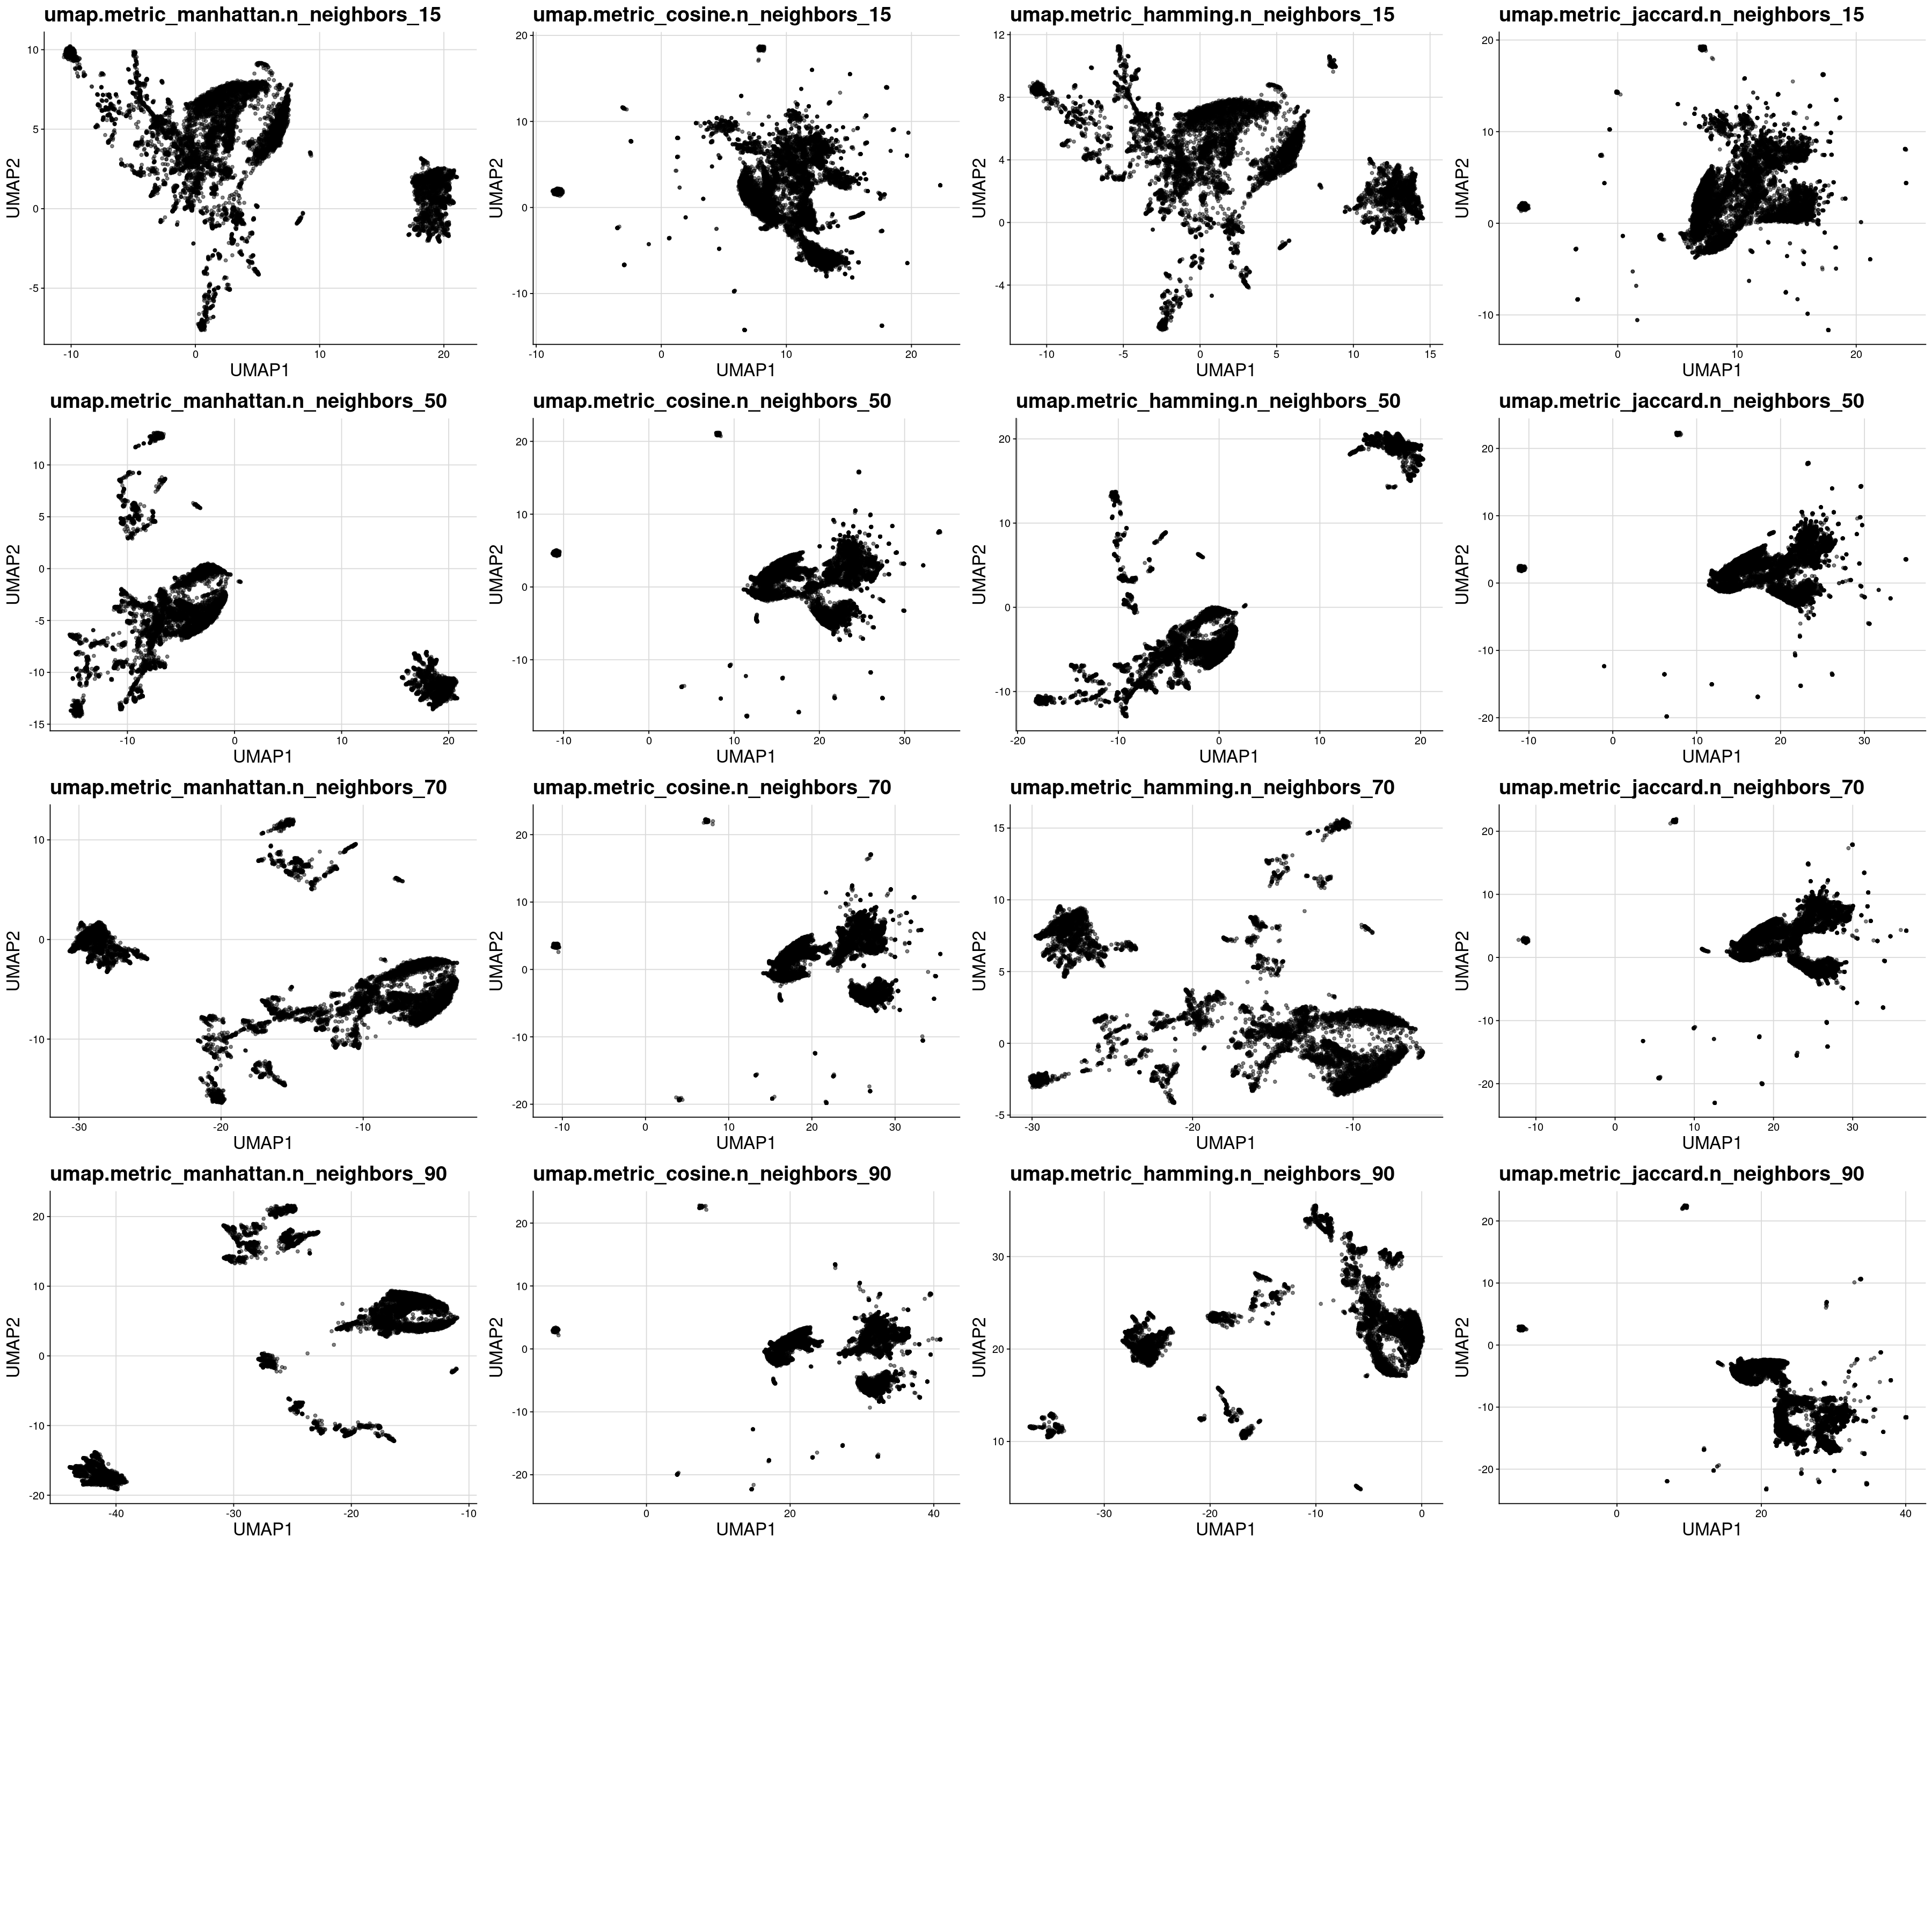

In [21]:
options(repr.plot.height=30, repr.plot.width=30)
plot_grid(plotlist = lst_gpt, nrow=5)

In [24]:
### init
lst = lst_dat_umap
num = 1000

###
theme_txt = theme(title = element_text(size=20))

###
lst = lapply(names(lst), function(txt){

    ### get data
    dat = lst[[txt]]
    
    ### sample rows
    set.seed(123)
    idx = sort(sample(1:nrow(dat), size = num))
    dat = dat[idx,]

    ### plot
    txt = paste("N_Neighbors", "=", txt)
    gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2)) + 
        geom_point() + 
        labs(title = txt) +
        theme_cowplot() + 
        background_grid() +
        theme_txt
    
    return(gpt)
})

lst_gpt = lst

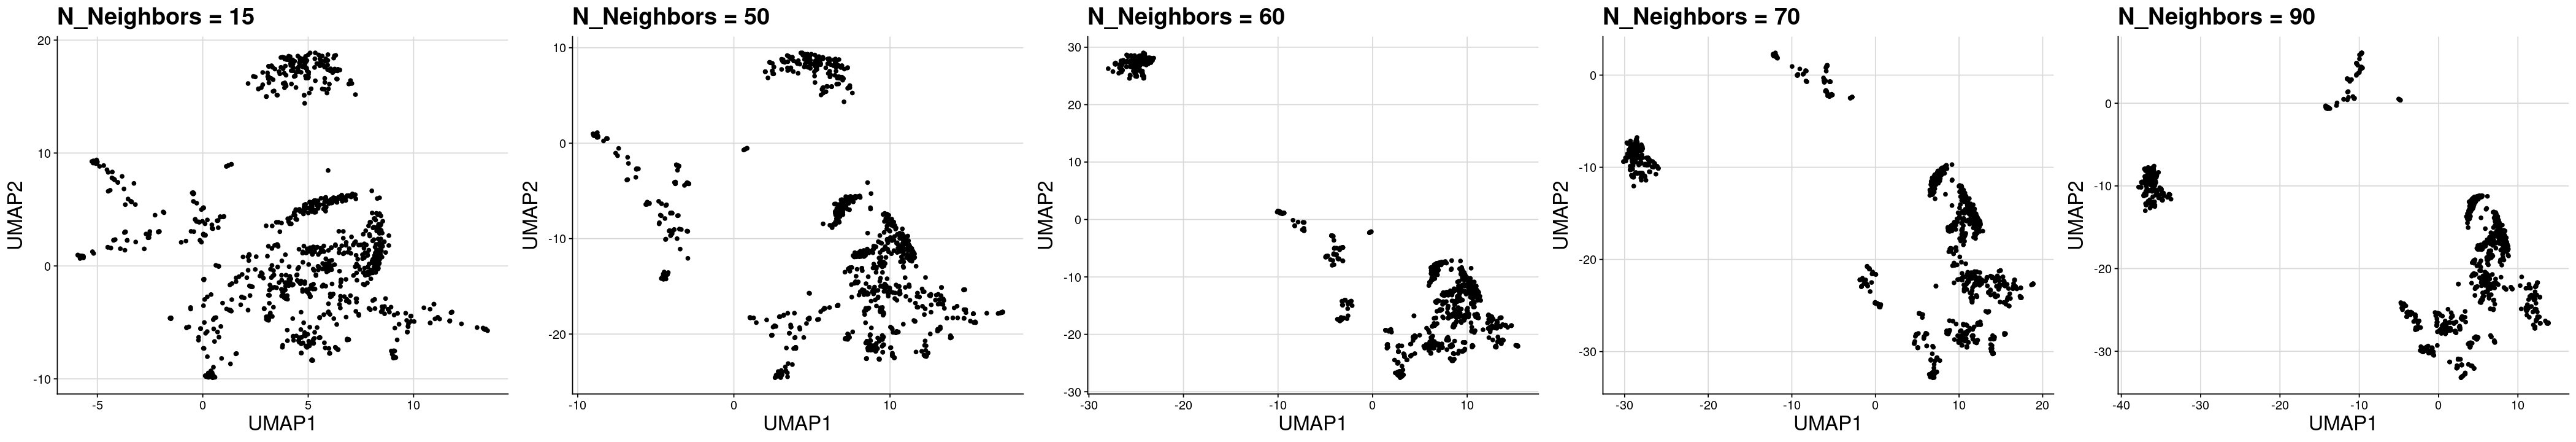

In [25]:
options(repr.plot.height=6, repr.plot.width=35)
plot_grid(plotlist = lst_gpt, nrow=1)